Time Domain Implementation of Wiener Filter 

In [67]:
# Importing the necessary libraries
import numpy as np
from scipy.linalg import toeplitz
from scipy.signal import lfilter
import matplotlib.pyplot as plt

In [68]:
# Signal restoration using Wiener Filtering
fs = 100        #Sampling Frequency
t = np.arange(0, 1 + 1 / fs, 1 / fs)       #Time vector
f1 = 5      # Signal Frequency
s = np.sin(2 * np.pi * f1 * t)
Ns = len(s)

In [69]:
# Generation of noise v(n)
v = np.random.randn(Ns) / 10

# Observed Signal
x = s + v

In [70]:
# Filter Characteristics
Nh = 9  #Length of the filter
rxx =  np.correlate(x, x, mode = 'full')
rxx = rxx[Ns - 1 : Ns - 1 + Nh]

rxy = np.correlate(s, x, mode = 'full')
rxy = rxy[Ns - 1: Ns - 1 + Nh]

In [71]:
# Wiener Filter
Rxx = toeplitz(rxx)
Rxx_inv = np.linalg.inv(Rxx)
# w = np.dot(Rxx_inv, rxy)

w = np.linalg.solve(Rxx_inv, rxy)

In [72]:
# debugging
print(w.shape)
print(x.shape)

(9,)
(101,)


In [73]:
y = lfilter(w, 1, x)

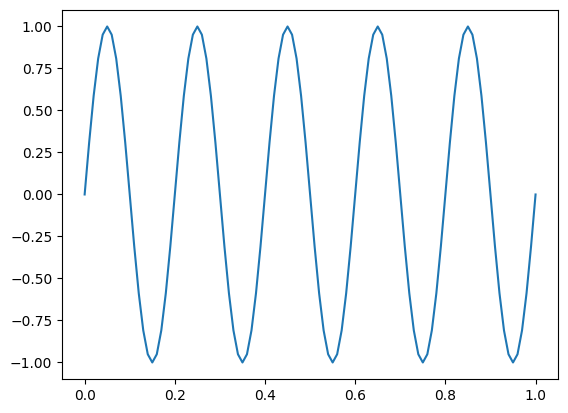

In [74]:
plt.plot(t,s);

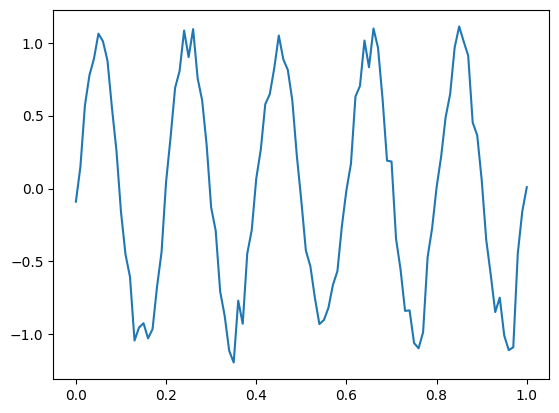

In [75]:
plt.plot(t,x);

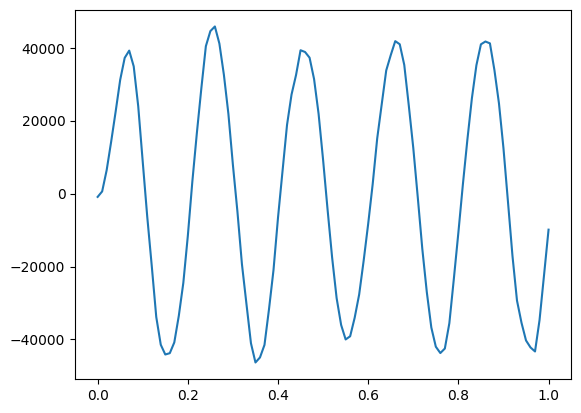

In [76]:
plt.plot(t,y);

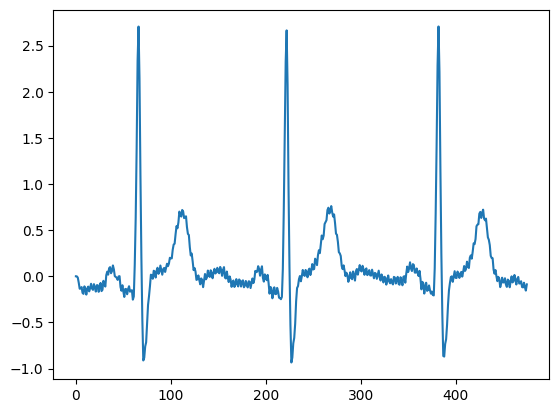

In [77]:
ecg = np.genfromtxt('ecg2x60.dat')
fs = 1000
L = len(ecg)
t = np.arange(1,L + 1) / fs 
plt.plot(ecg);

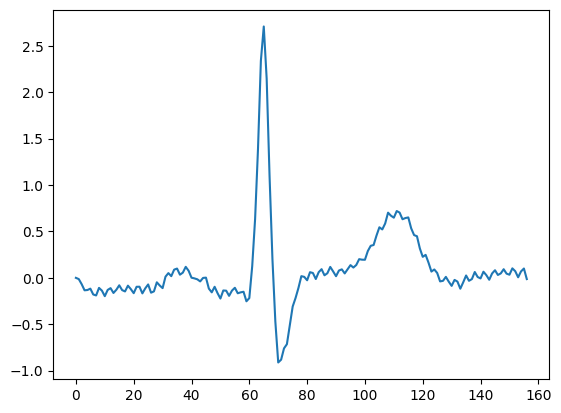

In [78]:
ecg_sel = ecg[1:158]
plt.plot(ecg_sel)

In [79]:
x = np.array([0, 20, 40, 45, 60, 65, 66, 70, 78, 85, 95, 102, 108, 117, 126, 135, 145, 157])
y = [ecg[i] for i in x]

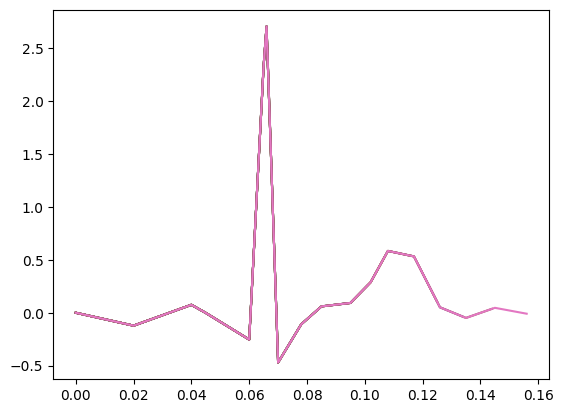

In [80]:
# Generting pieceise linear ECG cycle
linModel = []

for i in range(len(x) - 1): #for number of piecewise segment
    if y[i + 1] == y[i]:    #for number of piecewise segments
        a = y[i] * np.ones(x[i + 1] - x[i]) # FOr replicating previous values
    else:
        a = y[i] + (y[i + 1] - y[i]) / (x[i + 1] - x[i]) * np.arange(x[i + 1] - x[i])
        #for non zero slope
    linModel.extend(a[:-1]) # discarding last reductant point

    linModel.append(a[-1])

    fs = 1000
    t1 = np.arange(len(linModel)) / fs

    plt.plot(t1,linModel)

In [81]:
len(linModel), len(ecg_sel)

(157, 157)

In [82]:
Nh = 9  #Length of the filter
rxx =  np.correlate(linModel, linModel, mode = 'full')
rxx = rxx[Ns - 1 : Ns - 1 + Nh]

rxy = np.correlate(ecg_sel, linModel, mode = 'full')
rxy = rxy[Ns - 1: Ns - 1 + Nh]

In [83]:
# Wiener Filter
Rxx = toeplitz(rxx)
Rxx_inv = np.linalg.inv(Rxx)

w1 = np.linalg.solve(Rxx, rxy)

In [84]:
y1 = lfilter(w1, 1, linModel)

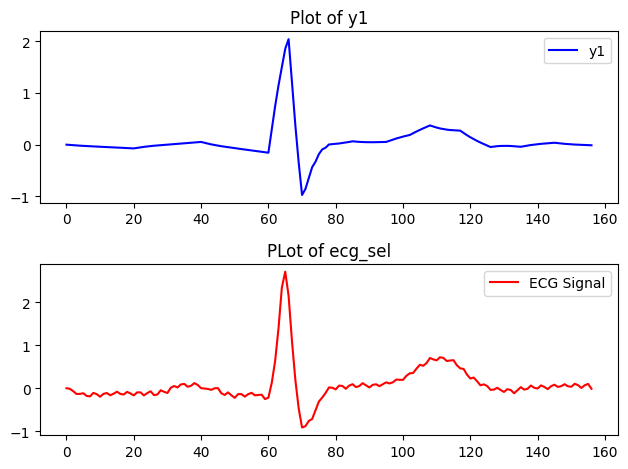

In [85]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y1, label = "y1", color = 'b')
plt.title('Plot of y1')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ecg_sel,label = 'ECG Signal',color = 'r')
plt.title("PLot of ecg_sel")
plt.legend()

plt.tight_layout()
plt.show()